In [9]:
# Install required libraries
# !pip install librosa matplotlib

import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
def plot_spectrogram(file_path, bpm=None, bars=16, log_scale=True, use_mel=False):

    """
    Supply file path to an mp3
    Optional:
      - known BPM (or will try to estimate)
      - bars (increments of 16 on x axis as default)
      - log scale (default to True for clearer visualization)
      - mel spectrograpm applies a Fourier transformation on audio signals windowed in time, to transform from time domain to frequency domain
      (default is short-time Fourier transform (STFT), used to analyze how the frequency content of a nonstationary signal changes over time. The magnitude squared of the STFT is known as the spectrogram time-frequency representation of the signal.)
    """
    y, sr = librosa.load(file_path, sr=None)  # 'sr=None' keeps the original sampling rate

    # if no bpm provided, estimate it first
    if bpm == None:
      bpm, beat_frames = librosa.beat.beat_track(y=y, sr=sr)
      print('Estimated tempo: {:.2f} beats per minute'.format(bpm))

    # compute the spectrogram (mel or STFT)
    if use_mel:
        # Mel spectrogram for smoother visualization across frequency scales
        S = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=4096, hop_length=512, n_mels=128)
        D = librosa.power_to_db(S, ref=np.max)
    else:
        # STFT spectrogram
        S = np.abs(librosa.stft(y, n_fft=2048, hop_length=512))**2  # Increased n_fft for finer resolution
        D = librosa.power_to_db(S, ref=np.max)

    # calculate bars based on bpm create x-axis ticks for bars
    beats_per_bar = 4
    samples_per_beat = sr * 60 / bpm
    samples_per_bar = samples_per_beat * beats_per_bar
    time_per_bar = samples_per_bar / sr
    total_bars = int(np.floor(len(y) / samples_per_bar))
    labels = [f"{i*bars}" for i in range(0, total_bars // bars + 1)]
    ticks = [i * bars * time_per_bar for i in range(0, total_bars // bars + 1)]

    # plot spectrogram figure
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log' if log_scale else 'hz', hop_length=512)

    # adjusting the x-axis
    plt.xticks(ticks, labels)

    plt.colorbar(format='%+2.0f dB')
    plt.title(f'{file_path} Spectrogram')
    plt.xlabel('Bars')
    plt.ylabel('Frequency (log scale)' if log_scale else 'Frequency')
    plt.show()


In [ ]:
aliases = dict(zip(['config', 'Alan Fitzpatrick, Joyhauser - Craving', 'Beyer, Giordani, Velvet - PATT', 'Lilly Palmer - Hare Ram', 'HI-LO - GENESIS', 'KREAM - So Hi', 'sample_data'], os.listdir()))

In [ ]:
chosen_aliases=['Alan Fitzpatrick, Joyhauser - Craving', 'Beyer, Giordani, Velvet - PATT', 'Lilly Palmer - Hare Ram', 'HI-LO - GENESIS', 'KREAM - So Hi']
bpms = [138, 133, 137, 138, 130]
songbpm = dict(zip(chosen_aliases, bpms))

The track is: Alan Fitzpatrick, Joyhauser - Craving
The bpm of the track is: 138


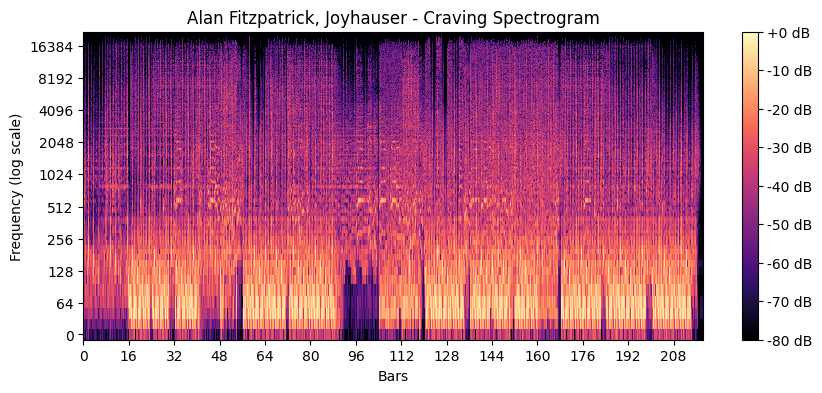

The track is: Beyer, Giordani, Velvet - PATT
The bpm of the track is: 133


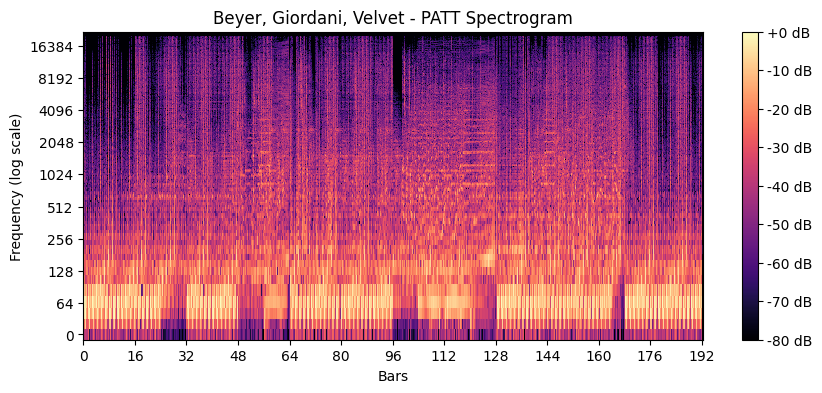

The track is: Lilly Palmer - Hare Ram
The bpm of the track is: 137


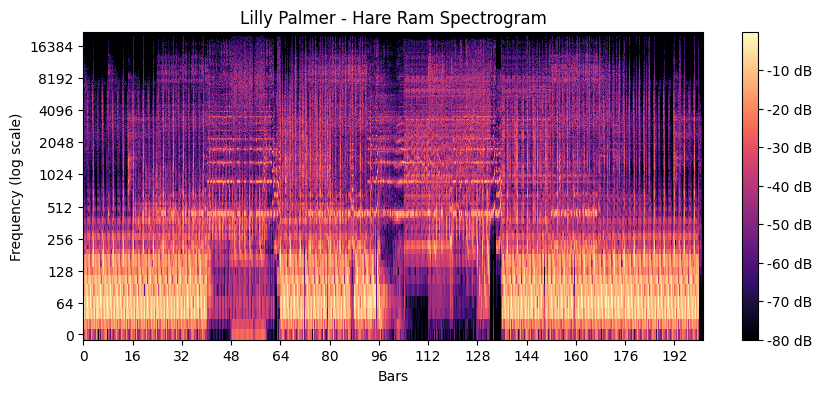

The track is: HI-LO - GENESIS
The bpm of the track is: 138


In [ ]:
for song, bpm in songbpm.items():
  print('The track is:', song)
  print('The bpm of the track is:', bpm)
  plot_spectrogram(song, bpm=bpm)

In [ ]:
songs = os.listdir()
songs.pop(0)
songs.pop(-1)
songs

['KREAM - So Hi (Extended Mix).mp3',
 'Whethan - ROOM IS ON FIRE (feat. AG Club).mp3',
 '83. GENESI (ITA) - Done (Extended).mp3',
 'Mau P - BEATS FOR THE UNDERGROUND (Original Mix).mp3',
 'Anti Up - The Weekend (Extended Mix).mp3']

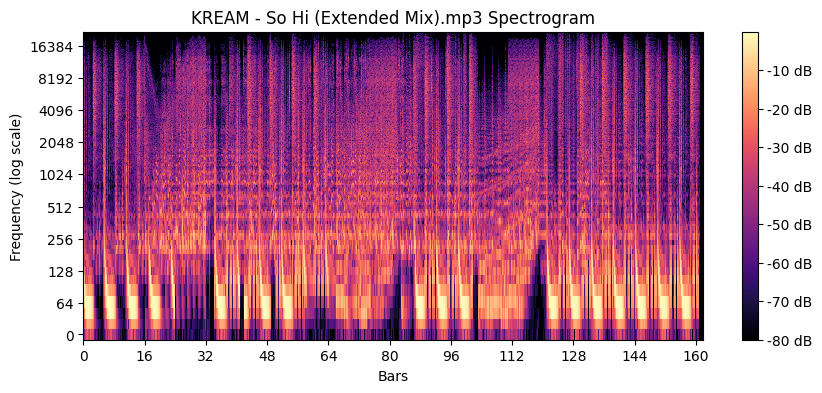

In [ ]:
plot_spectrogram(songs[0], bpm = 130)

Estimated tempo: 123.05 beats per minute


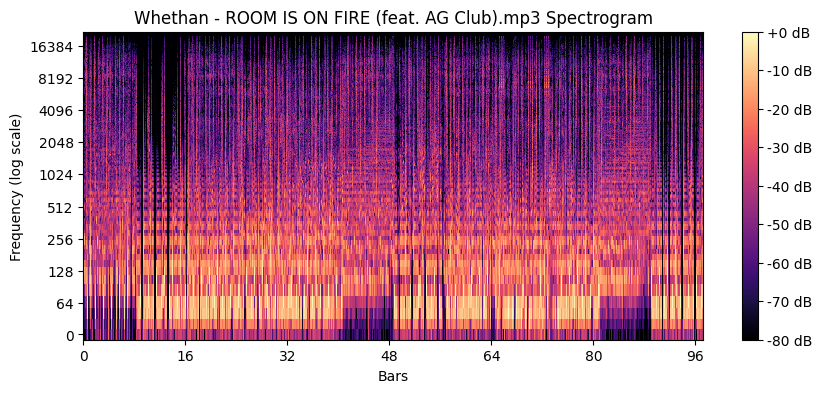

Estimated tempo: 129.20 beats per minute


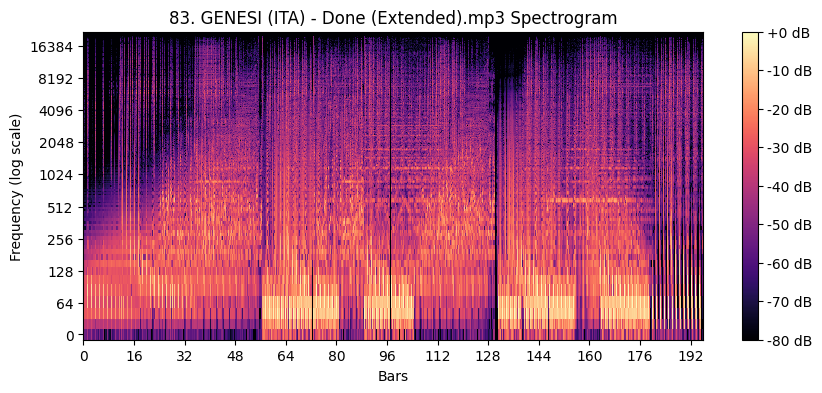

Estimated tempo: 126.05 beats per minute


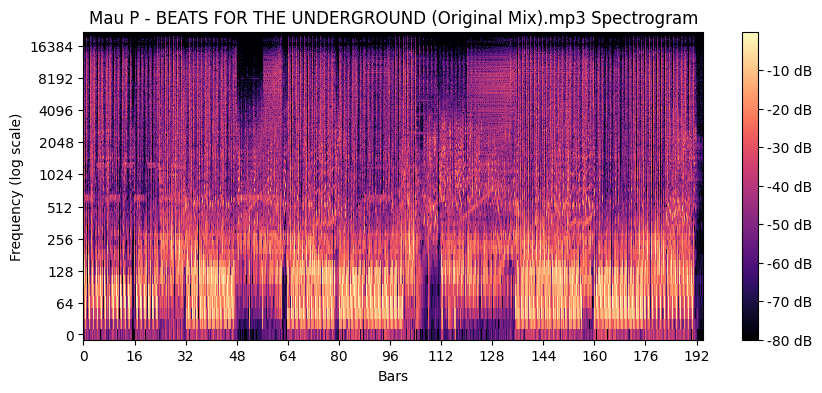

Estimated tempo: 132.51 beats per minute


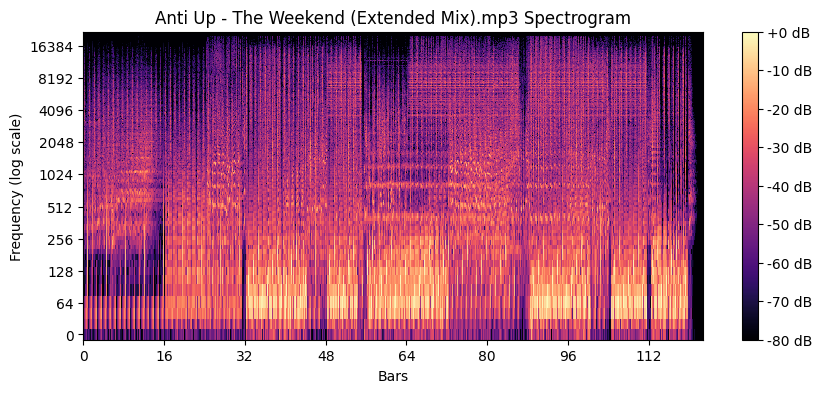

In [ ]:
for song in songs[1:]:
  plot_spectrogram(song)

In [ ]:
! mkdir ./DRUMCODE

In [ ]:
drumcode_tracks = ['./DRUMCODE/' + s for s in os.listdir('./DRUMCODE') if s.endswith('.mp3')]

Estimated tempo: 136.00 beats per minute


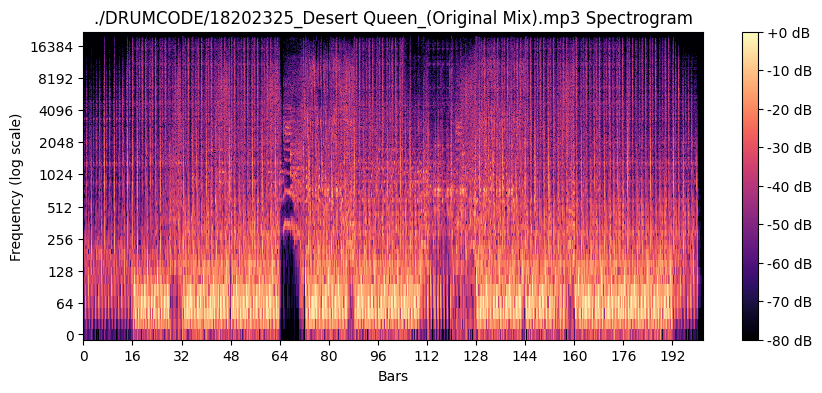

Estimated tempo: 129.20 beats per minute


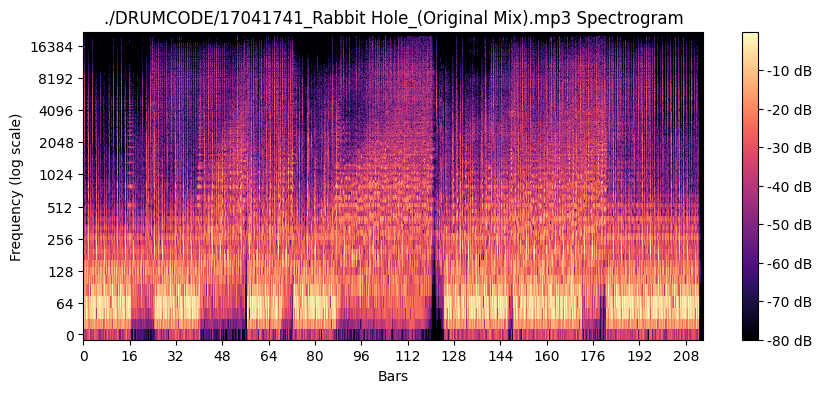

Estimated tempo: 132.51 beats per minute


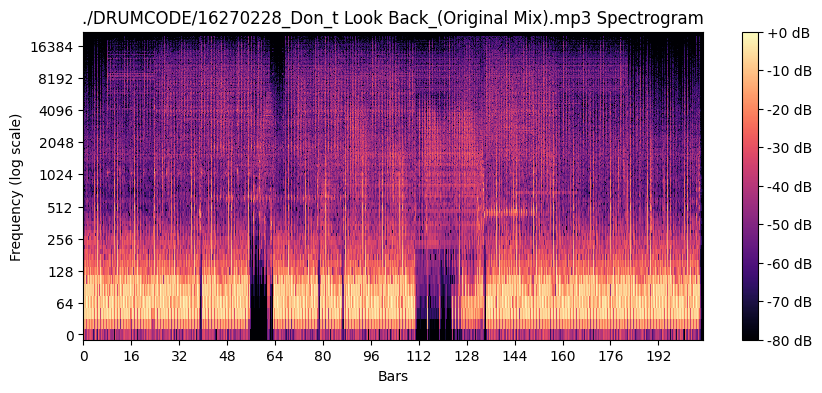

Estimated tempo: 136.00 beats per minute


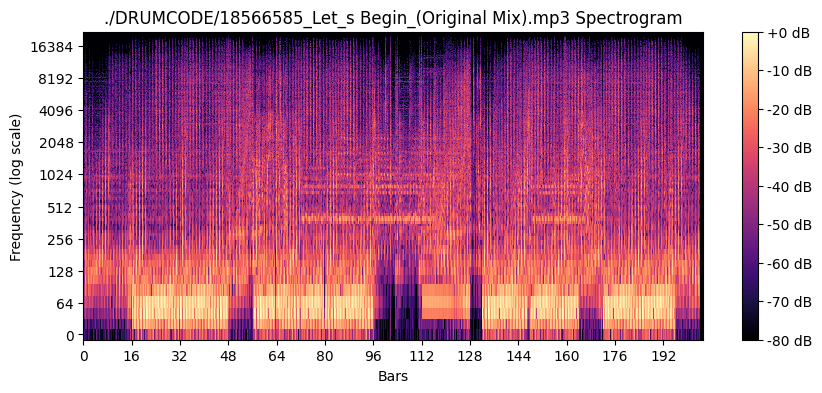

Estimated tempo: 136.00 beats per minute


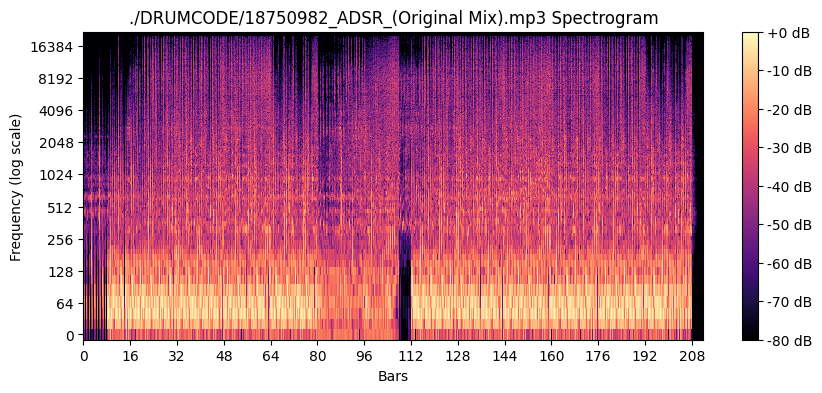

Estimated tempo: 132.51 beats per minute


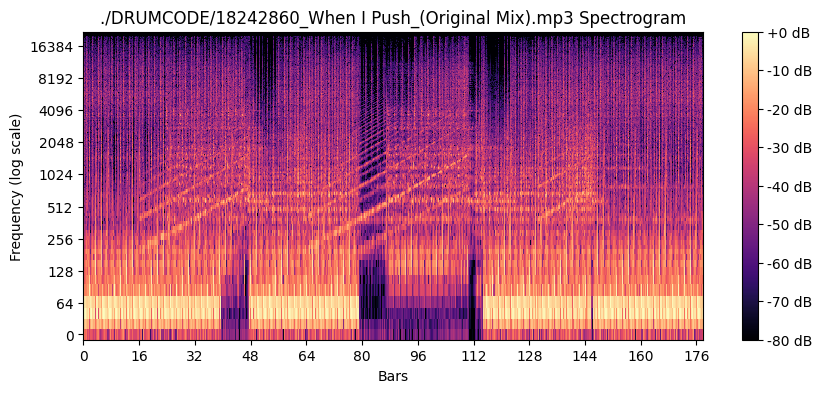

In [ ]:
for track in drumcode_tracks:
  plot_spectrogram(track)

In [ ]:
tracks = [s for s in os.listdir('.') if s.endswith('.mp3')]

In [ ]:
tracks

['18884046_EAT THE BASS_(Extended Mix).mp3',
 "18525383_Let's Go Dancing_(Matroda Remix).mp3",
 '18017349_Diamonds On My Mind_(Extended Mix).mp3']

Estimated tempo: 129.20 beats per minute


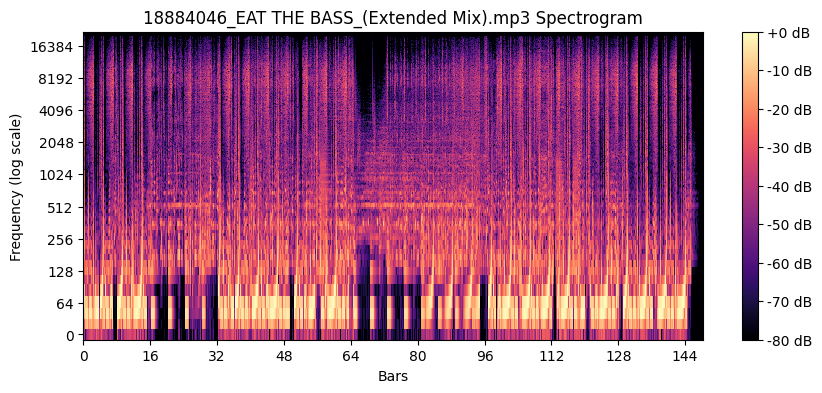

Estimated tempo: 129.20 beats per minute


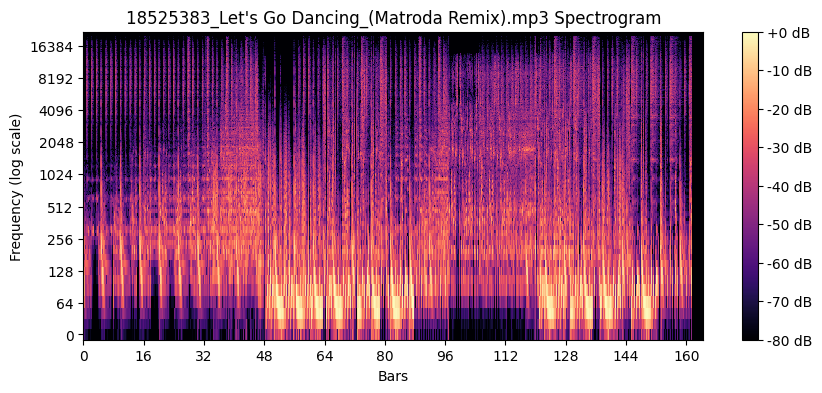

Estimated tempo: 136.00 beats per minute


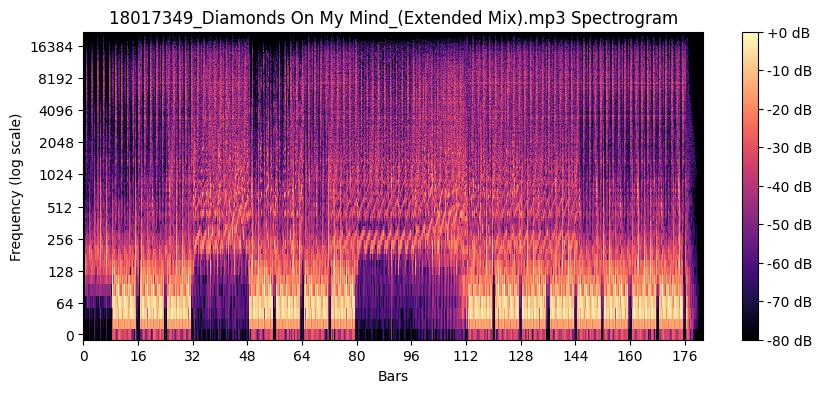

In [ ]:
for track in tracks:
  plot_spectrogram(track)

## Evaluating within artist consistency

Case study:

KREAM

In [7]:
tracks = [s for s in os.listdir('.') if s.endswith('.mp3')]

Estimated tempo: 126.05 beats per minute


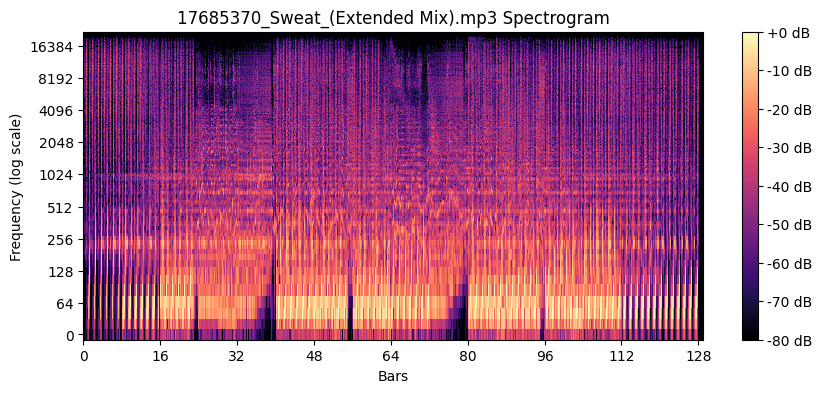

Estimated tempo: 126.05 beats per minute


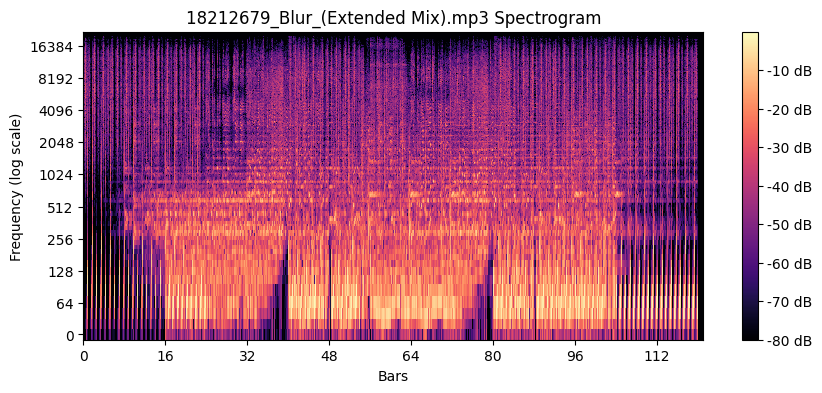

Estimated tempo: 126.05 beats per minute


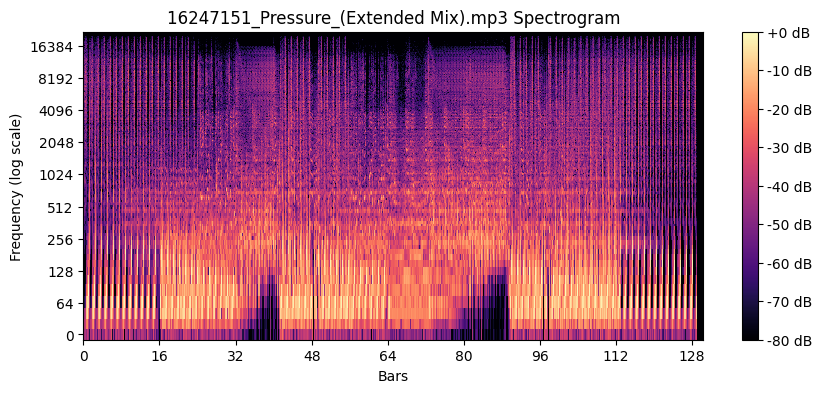

In [8]:
for track in tracks:
  plot_spectrogram(track)